# Imports and Functions

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import re
from sklearn.model_selection import train_test_split
#import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, accuracy_score, confusion_matrix, classification_report, fbeta_score,  r2_score

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

from sklearn.model_selection import (GridSearchCV,
                                     train_test_split)
from sklearn.metrics import (classification_report,
                             mean_squared_error,
                             mean_absolute_error)
from matplotlib import pyplot as plt
import xgboost as xgb
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
from sklearn import manifold 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso


In [2]:
def test_results(y_test, y_test_pred, y_test_pred_pr):

    print("*********TEST RESULTS*********")

    auc_plotting(y_test, y_test_pred_pr)
    auc_score, accuracy, precision, recall, f1 = results_summary(y_test, y_test_pred, y_test_pred_pr)

    print("Classification Report:")
    print(sklearn.metrics.classification_report(y_test, y_test_pred))

    return auc_score, accuracy, precision, recall, f1


def auc_plotting(y_test, y_pred_probs):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr) # compute area under the curve
#     auc_score = sklearn.metrics.roc_auc_score(y_test, y_pred_probs)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show() 
    
def results_summary(y_test,y_pred, y_test_pred_pr):
    auc_score = sklearn.metrics.roc_auc_score(y_test, y_test_pred_pr)
    accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
    precision = sklearn.metrics.precision_score(y_test, y_pred)
    recall = sklearn.metrics.recall_score(y_test, y_pred)
    kappa = sklearn.metrics.cohen_kappa_score(y_test, y_pred)
    f1 = sklearn.metrics.f1_score(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
    print("AUC %s " % auc_score)
    print("Accuracy %s " % accuracy)
    print("Precision %s " % precision)
    print("Recall %s " % recall )
#     print("Kappa %s " % kappa)
    print("F1 %s " % f1)
#     print("R2 Score %s " % r2)
#     print("Confusion Matrix:")
#     confusion_matrix(y_test, y_pred)
    
    print("Confusion Matrix:")
    # Confusion Matrix for evaluaiton of results
    cnf_matrix_log = confusion_matrix(y_test, y_pred)
    class_names=['Active','Churned'] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True, cmap="Blues" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    
    
    return auc_score, accuracy, precision, recall, f1

In [198]:
# data = pd.read_csv('results-for-survey-for-mu-2020-07-27-0838.csv', encoding = 'latin',  index_col = False)
#data = pd.read_csv('cleaned_file.csv', encoding = 'Latin')
data = pd.read_csv('cleaned_file_nans.csv', encoding = 'Latin')

In [199]:
data.shape

(169, 96)

# Pre-processing and Feature Selection

In [200]:
df = data.dropna(axis=1, how = 'all')
df = data.drop (columns = {"potentials", "tries"})
# df = df.rename(columns={"convert": "muslim"})

# create a dataframe for feature selection for successful nikkah

#number_attributes = df.loc[:, df.dtypes == np.int64]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 94 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unique Response Number         169 non-null    object 
 1   num_tries                      169 non-null    int64  
 2   cat_tries                      169 non-null    object 
 3   duration_search                167 non-null    object 
 4   num_cat_tries                  169 non-null    int64  
 5   short_search                   169 non-null    int64  
 6   med_search                     169 non-null    int64  
 7   long_search                    169 non-null    int64  
 8   num_sites_using                169 non-null    int64  
 9   recommends_searching_online    169 non-null    object 
 10  recommends_search_online       169 non-null    int64  
 11  app_recommendations            91 non-null     object 
 12  app_recommendations1           86 non-null     obj

In [201]:
#changing number of potentials met (categories) to binary columns 
# df['cat_potentials']= df['cat_potentials']. copy()
# df.info()
# df = df.rename(columns={"cat_potentials": "potentials"})
# df = pd.get_dummies(df, columns=['potentials'])


In [202]:
#changing number of tries (categories) to binary columns
# df = pd.get_dummies(df, columns=['tries'])

In [203]:
df = df.set_index('Unique Response Number')

In [204]:

df.head()


,num_tries,cat_tries,duration_search,num_cat_tries,short_search,med_search,long_search,num_sites_using,recommends_searching_online,recommends_search_online,app_recommendations,app_recommendations1,app_recommendations2,app_recommendations3,num_potentials,cat_potentials,num_cat_potentials,positive_exper,sexting_asked,felt_blackmailed,asked_for_money,neg_exper,muslim,convert,convert_years,...,div_factor_pers,div_factor_prac_mismatch,div_factor_interfere,div_factor_distance,div_factor_other,country_of_origin1,american,british,canadian,south_asian,arab,other_european,nat_other,country_of_origin2,country_of_origin3,gender,binry_gender,age_now,young,educational_level,ug,pg,diploma,edu_other,successful_search
Unique Response Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
579279-579270-56970383,2,Two,3 to 5 years,2,0,0,1,3,"Yes, but with caution",1,Pure matrimony,Pure Matrimony,NaN,NaN,1,One,1,1,No,No,No,0,All my life,0,NaN,...,0.0,0.0,0.0,1.0,0.0,Canada,0,0,1,0,0,0,0,NaN,NaN,Female,1,41 to 50,0,College diploma or certificate,0,0,1,0,1
579279-579270-56971212,10,10 and up,No longer searching,6,0,0,0,3,"Yes, 100%",1,Muzz mach,Muzmatch,NaN,NaN,6,6 to 8,4,0,No,No,No,0,All my life,0,NaN,...,NaN,NaN,NaN,NaN,NaN,UK,0,1,0,0,0,0,0,NaN,NaN,Male,0,51 to 60,0,None of the above,0,0,0,1,1
579279-579270-56972019,50,10 and up,3 to 5 years,6,0,0,1,5,"No, except in certain cases",0,NaN,NaN,NaN,NaN,10,9 and up,5,0,Yes,Yes,No,1,All my life,0,NaN,...,NaN,NaN,NaN,NaN,NaN,UK,0,1,0,0,0,0,0,NaN,NaN,Female,1,21 to 30,1,University - graduate degree (Masters),0,1,0,0,0
579279-579270-56972580,1,One,No longer searching,1,0,0,0,2,Absolutely not,0,NaN,NaN,NaN,NaN,1,One,1,0,No,No,No,0,All my life,0,NaN,...,NaN,NaN,NaN,NaN,NaN,Italy,0,0,0,0,0,1,0,NaN,NaN,Male,0,21 to 30,1,University - graduate degree (Masters),0,1,0,0,0
579279-579270-56976477,3,Three,4 to 12 months,3,0,1,0,1,"Yes, but with caution",1,Muzmatch,Muzmatch,NaN,NaN,8,6 to 8,4,0,No,No,No,0,All my life,0,NaN,...,NaN,NaN,NaN,NaN,NaN,UK,0,1,0,0,0,0,0,NaN,NaN,Female,1,41 to 50,0,Secondary/high school diploma or certificate,0,0,0,1,0


In [167]:
df.isnull().sum()

num_tries                          0
cat_tries                          0
num_cat_tries                      0
duration_search                    2
short_search                       0
med_search                         0
long_search                        0
num_sites_using                    0
recommends_searching_online        0
recommends_search_online           0
app_recommendations               78
app_recommendations1              83
app_recommendations2             145
app_recommendations3             162
num_potentials                     0
cat_potentials                     0
num_cat_potentials                 0
positive_exper                     0
sexting_asked                      0
felt_blackmailed                   0
asked_for_money                    0
neg_exper                          0
muslim                             0
convert                            0
convert_years                    151
when_converted                   155
married_before                     0
t

In [168]:
#number_attributes = df.loc[:, df.dtypes == np.int64]
#search = df[['div_factor_distance','div_factor_interfere','div_factor_prac_mismatch','succ_short_search','succ_med_search', 'succ_long_search','succ_muzmatch','succ_muslima','succ_single_muslim','succ_other','succ_pur_matri','citizens','live_together','ethnicity_match', 'education_match','practice_match', 'age_match', 'young_nikkah','div_factor_pers','div_factor_other', 'convert','num_cat_tries', 'num_sites_using', 'num_cat_potentials','binry_gender','young','ug','pg','diploma', 'edu_other', 'american', 'canadian', 'british','south_asian','arab','other_european', 'nat_other','recommends_search_online','short_search', 'med_search','long_search', 'positive_exper', 'neg_exper', 'single_during_search', 'successful_search']]
search = df[['convert' ,'num_sites_using','num_cat_tries','num_cat_potentials', 'binry_gender','young','ug','pg','diploma', 'edu_other', 'american', 'canadian', 'british','south_asian','arab','other_european', 'nat_other','recommends_search_online','short_search', 'med_search','long_search', 'positive_exper', 'neg_exper', 'single_during_search', 'successful_search']]


# #print (number_attributes.dtypes.sort_values())
search


,convert,num_sites_using,num_cat_tries,num_cat_potentials,binry_gender,young,ug,pg,diploma,edu_other,american,canadian,british,south_asian,arab,other_european,nat_other,recommends_search_online,short_search,med_search,long_search,positive_exper,neg_exper,single_during_search,successful_search
Unique Response Number,,,,,,,,,,,,,,,,,,,,,,,,,
579279-579270-56995542,0,1,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
579279-579270-63891038,1,1,2,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
579279-579270-63912357,0,2,5,2,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1
579279-579270-56999514,0,3,1,2,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
579279-579270-62818814,0,1,4,3,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1
579279-579270-63889021,0,3,5,3,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1
579279-579270-63895229,0,3,3,3,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1
579279-579270-56971212,0,3,6,4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
579279-579270-57003585,1,2,4,3,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1


In [136]:
# create a dataframe for feature selection for successful nikkah

#nikkah = df[['num_tries','num_sites_using','num_potentials','short_nikkah', 'med_nikkah', 'long_nikkah', 'succ_short_search','succ_med_search', 'succ_long_search', 'succ_muzmatch', 'succ_single_muslim','succ_muslima','succ_other', 'succ_pur_matri','single_during_search','citizens','live_together','ethnicity_match', 'education_match','practice_match', 'age_match', 'young_nikkah', 'div_factor_pers','div_factor_prac_mismatch', 'div_factor_interfere','div_factor_distance', 'div_factor_other', 'diploma','ug', 'pg', 'edu_other', 'binry_gender', 'american', 'canadian', 'british', 'south_asian', 'other_european','nat_other','arab','convert','successful_nikkah']]
nikkah = df[['short_nikkah', 'med_nikkah', 'long_nikkah', 'succ_short_search','succ_med_search', 'succ_long_search', 'succ_muzmatch', 'succ_single_muslim','succ_muslima','succ_other', 'succ_pur_matri','single_during_search','citizens','live_together','ethnicity_match', 'education_match','practice_match', 'age_match', 'young_nikkah', 'div_factor_pers','div_factor_prac_mismatch', 'div_factor_interfere','div_factor_distance', 'div_factor_other', 'diploma','ug', 'pg', 'edu_other', 'binry_gender', 'american', 'canadian', 'british', 'south_asian', 'other_european','nat_other','arab','convert','successful_nikkah']]

nikkah


,short_nikkah,med_nikkah,long_nikkah,succ_short_search,succ_med_search,succ_long_search,succ_muzmatch,succ_single_muslim,succ_muslima,succ_other,succ_pur_matri,single_during_search,citizens,live_together,ethnicity_match,education_match,practice_match,age_match,young_nikkah,div_factor_pers,div_factor_prac_mismatch,div_factor_interfere,div_factor_distance,div_factor_other,diploma,ug,pg,edu_other,binry_gender,american,canadian,british,south_asian,other_european,nat_other,arab,convert,successful_nikkah
Unique Response Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
579279-579270-56995542,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
579279-579270-63891038,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1
579279-579270-63912357,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0
579279-579270-56999514,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
579279-579270-62818814,1,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
579279-579270-63889021,0,0,1,0,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
579279-579270-63895229,0,0,1,0,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
579279-579270-56971212,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
579279-579270-57003585,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


In [137]:
#Change certain columns to correct type

df['app_recommendations'] = df['app_recommendations'].astype(str)
df['duration_search_until_nikkah'] = df['duration_search_until_nikkah'].astype(str)
df['num_tries'] = df['num_tries'].astype(float)
#df['successful_search'] = df['successful_search'].astype('int')


In [138]:
#Make Gender column binary ones and zeros
# df['gender'] = df['gender'].replace('Female', 1)
# df['gender'] = df['gender'].replace('Male', 0)
# df['gender'] = df['gender'].astype('category')

#Create a new binary column (where 1 is a convert, zero is not a convert)
# df = df.replace({'Yes':True ,'No':False})
# df['convert'] = df['muslim'].str.contains('Other')
# df['convert'] = df['convert'].apply(lambda x: 1 if x == True else 0)
# df['convert'] = df['convert'].astype('category')

# #Create a new binary column (where 1 is someone who is no longer searching, zero is someone who is still searching)
# df['no_longer_searching'] = df['duration_search'].str.contains('No longer searching')
# df['no_longer_searching'] = df['no_longer_searching'].apply(lambda x: 1 if x == True else 0)
# df['no_longer_searching'] = df['no_longer_searching'].astype('category')

# #Create a new binary column (where 1 is someone who has never met any potential spouse in person, zero is someone who has met at least one person)
# df['never_met_in_person'] = df['potentials_experiences'].str.contains('Don\'t know, never met anyone in person')
# df['never_met_in_person'] = df['never_met_in_person'].apply(lambda x: 1 if x == True else 0)
# df['never_met_in_person'] = df['never_met_in_person'].astype('category')


# df['single_while_searching'] = df['mar_status_when_searching'].str.contains('Single')
# df['single_while_searching'] = df['single_while_searching'].apply(lambda x: 1 if x == True else 0)


# # Change Single and Divorcee labels to binary ones and zeros
# # df['mar_status_during_search'] = df['mar_status_during_search'].replace('Single', 1)
# # df['mar_status_during_search'] = df['mar_status_during_search'].replace('Divorcee', 0)
# df['mar_status_during_search'] = df['mar_status_during_search'].astype('category')

# #Create a new binary column (where 1 is successful nikkah, meaning lasted more than 5 years, zero is success-in-progress)
# #'successful'] = df['successful'].apply(lambda x: 1 if x == True else 0)

# #Create a new binary column (where 1 is successful search, meaning found spouse online, zero is still searching or found spouse offline)
# # df['found_spouse'] = df[['duration_search_until_nikkah'].str.contains('Did not find a spouse online')== False]
# # df['found_spouse'] = df['found_spouse'].apply(lambda x: 1 if x == True else 0)


In [169]:
# Step One of Scikit-learn's 'SelectKBest' feature selection, code retrieved from https://www.datacamp.com/community/tutorials/feature-selection-python, accessed on August 23, 2020

array = search.values
X = array[:,0:24]
Y = array[:,24]

In [170]:
# Step Two of Scikit-learn's 'SelectKBest' feature selection

# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [171]:
# Step Three of Scikit-learn's 'SelectKBest' feature selection using Chi-Squared test

# Feature extraction
test = SelectKBest(score_func=chi2, k=6)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:25,:])

[1.696e+01 4.757e-02 2.961e-02 8.746e+00 3.120e-01 2.676e+00 1.967e+00
 2.050e-02 6.855e+00 1.046e-01 4.991e-03 9.210e-01 2.517e-02 7.907e-01
 6.689e-01 1.703e+00 4.022e-05 8.674e-01 4.501e-01 1.759e+00 3.522e+00
 3.175e+00 4.050e-01 8.619e-01]
[[0 2 0 0 0 0]
 [1 1 1 0 0 0]
 [0 2 0 0 0 0]
 [0 2 0 0 0 0]
 [0 3 1 0 0 0]
 [0 3 0 0 0 0]
 [0 3 1 0 0 0]
 [0 4 0 0 0 0]
 [1 3 1 1 0 0]
 [0 1 0 1 1 1]
 [0 3 0 0 0 0]
 [0 5 1 0 1 0]
 [0 1 1 0 0 1]
 [1 1 0 1 0 1]
 [1 1 1 0 0 1]
 [0 1 0 1 0 0]
 [1 3 0 1 0 1]
 [0 1 0 1 0 1]
 [1 1 1 1 0 1]
 [1 3 0 0 0 0]
 [1 1 0 0 0 1]
 [0 1 1 0 1 0]
 [1 2 1 1 1 0]
 [1 2 1 1 1 0]
 [1 3 1 0 0 0]]


In [142]:
# Now, repeat 2 steps for SelectKBest for successful nikkahs

array2 = nikkah.values
XX = array2[:,0:37]
YY = array2[:,37]

In [143]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(XX, YY)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(XX)
# Summarize selected features
print(features[0:15,:])

[5.570e-01 4.177e-01 1.430e+02 2.438e+01 2.248e+00 7.095e+00 5.599e+00
 6.217e+00 2.873e+01 1.064e+01 1.392e-01 3.205e-03 3.975e+01 7.646e+01
 3.108e+01 5.599e+00 4.973e+01 1.328e+02 5.213e+01 3.481e-01 3.481e-01
 2.785e-01 2.089e-01 3.481e-01 4.476e+00 2.232e+00 3.290e-02 1.683e+00
 1.017e+00 3.095e-01 3.061e+00 1.237e+00 6.137e-04 6.564e-02 5.570e-01
 1.184e+00 2.128e+01]
[[0 1 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 1 1 1]
 [0 1 0 1 0 0 0 1 1 0]
 [0 1 0 0 1 1 0 1 0 0]
 [0 0 0 1 1 1 1 1 1 0]
 [1 0 0 1 1 1 1 1 1 0]
 [1 0 0 1 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 0 0]
 [1 1 0 1 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 1 1 1 1 1 0]
 [0 0 0 1 0 0 1 1 1 0]
 [0 0 0 1 1 1 1 1 1 0]
 [1 1 1 1 1 0 1 2 1 1]
 [0 1 0 1 1 0 1 2 1 1]]


In [172]:
# Use the wrapper method of feature selection called Recursive Elimination

# Step One
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [173]:
#Step Two for Search
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [ True False False False False  True False False False False False False
 False False False  True False False False  True  True False False False]
Feature Ranking: [ 1 18 17  7 12  1 15 14  4 11 16 10 13  5 19  1 20  3  9  1  1  6  8  2]


In [174]:
#Step Two for Nikkah
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(XX, YY)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [ True False  True False False False False False False False False False
 False  True False False False  True  True False False False False False
 False False False False False False False False False False False False
 False]
Feature Ranking: [ 1  7  1 14 22 19 27 33 24 23 21  4 11  1  3 29  8  1  1  9  2 16 20 15
 26 32 18 28  6 17 10 13 30 31 25 12  5]


In [175]:
#Adding constant column of ones, mandatory for sm.OLS model
df["successful_search"] = data.successful_search[[1]]
Z = df.drop("successful_search",1)   #Feature Matrix
y = df["successful_search"]          #Target Variable

X_1 = sm.add_constant(Z)
#Fitting sm.OLS model - doesn't seem to work!
# model = sm.OLS(y,X_1).fit()
# model.pvalues

In [176]:
#dropping repeated columns that are already there in binary forms
#df = df.drop(columns = {"sexting_asked", "felt_blackmailed", 'asked_for_money', 'married_before'})

In [177]:
#Change muslim column into binary
#df['muslim'] = df['muslim'].apply(lambda x: 1 if x == 'All my life' else 0)

In [178]:
#Change martial status into binary
#df['mar_status_when_searching'] = df['mar_status_when_searching'].apply(lambda x: 1 if x == 'Single' else 0)

In [29]:
#weka = df[[ "num_sites_using","num_potentials", "num_tries","successful_search","potentials_exp","convert", "gender","young","edu_level_0","edu_level_1","edu_level_2", "edu_level_3", "edu_level_4", "edu_level_5", "edu_level_6","never_met_in_person","recommends_search_online","duration_search_0 to 30 days", "duration_search_1 to 3 months","duration_search_4 to 12 months", "duration_search_1 to 2 years", "duration_search_3 to 5 years", "duration_search_Over 5 years", "no_longer_searching","sexting", "blackmail", "money", "mar_status_during_search" ]]
#weka.to_csv('thesis.csv')

In [93]:
df['app_recommendations1'] = df['app_recommendations1'].str.strip()
df['app_recommendations2'] = df['app_recommendations2'].str.strip()
df['app_recommendations3'] = df['app_recommendations3'].str.strip()
df['app_success'] = df['app_success'].str.strip()
totals_app_recommend1 = df['app_recommendations1'].value_counts()
totals_app_recommend1 = pd.DataFrame(totals_app_recommend1)
totals_app_recommend1

,app_recommendations1
Muzmatch,46
Pure Matrimony,6
Reddit,5
Minder,5
Single Muslim,4
Half Our Deen,4
Hinge,3
Muslima,3
Facebook,2
Dil Mil,1


In [94]:
totals_app_recommend2 = df['app_recommendations2'].value_counts()
totals_app_recommend2 = pd.DataFrame(totals_app_recommend2)
totals_app_recommend2

,app_recommendations2
Minder,6
Muzmatch,6
Shaadi,2
Half Our Deen,2
MawaddahMatrimony,1
Badoo,1
Muslims Meet Online,1
Telegram,1
Single Muslim,1
OkCupid,1


In [95]:
totals_app_recommend3 = df['app_recommendations3'].value_counts()
totals_app_recommend3 = pd.DataFrame(totals_app_recommend3)
totals_app_recommend3

,app_recommendations3
Half Our Deen,2
Dil Mil,2
Muslima,1
Shaadi,1
Pure Matrimony,1


In [96]:
frames = [totals_app_recommend1, totals_app_recommend2, totals_app_recommend3]
recom = pd.concat(frames)
recom = recom.sum(axis = 1)
recom = pd.DataFrame(recom)
recom = recom.reset_index()
recom = recom.groupby(['index']).sum()
recom

,0
index,
Badoo,1.0
Coffee Meets Bagel,1.0
Dil Mil,3.0
Facebook,2.0
Half Our Deen,8.0
Hinge,4.0
Islamicmarriage.com,1.0
MawaddahMatrimony,1.0
Minder,11.0


In [99]:
recom.sum()


0    117.0
dtype: float64

In [133]:
# Trying to get the top 5 

# top = recom['0'].isin(recom['0'].counts().index[:5])
# recom.loc[~top, '0'] = "other"

In [36]:
df['app_success'].value_counts()

Muzmatch               7
Undetermined           3
Pure Matrimony         2
Muslima                2
Single Muslim          2
Reddit                 1
Half Our Deen          1
Islamicmarriage.com    1
Shaadi                 1
Facebook               1
Doongle                1
Name: app_success, dtype: int64

In [40]:
#changing list of apps that lead to a successful nikkah to binary columns
#df = pd.get_dummies(df, columns=['app_success'])

In [41]:
df['country_of_origin1'] = df['country_of_origin1'].str.strip()
df['country_of_origin2'] = df['country_of_origin2'].str.strip()
df['country_of_origin3'] = df['country_of_origin3'].str.strip()
totals_country1 = df['country_of_origin1'].value_counts()
totals_country1 = pd.DataFrame(totals_country1)
totals_country1

,country_of_origin1
USA,46
UK,43
Canada,30
Saudi Arabia,8
UAE,7
Pakistan,5
India,4
Netherlands,3
Belgium,2
Ireland,2


In [42]:
totals_country2 = df['country_of_origin2'].value_counts()
totals_country2 = pd.DataFrame(totals_country2)
totals_country2

,country_of_origin2
USA,4
Canada,3
India,3
Egypt,2
Pakistan,2
UAE,1
Kenya,1
Turkey,1


In [56]:
totals_country3 = df['country_of_origin3'].value_counts()
totals_country3 = pd.DataFrame(totals_country3)
totals_country3

,country_of_origin3
USA,4
UK,1
India,1
Canada,1
Sudan,1


In [44]:
frames1 = [totals_country1, totals_country2, totals_country3]
country = pd.concat(frames1)
country = country.sum(axis = 1)
country = pd.DataFrame(country)
country = country.reset_index()
country = country.groupby(['index']).sum()
country

,0
index,
Algeria,2.0
Australia,1.0
Belgium,2.0
Bosnia,1.0
Canada,34.0
Costa Rica,1.0
Czech Republic,1.0
Egypt,2.0
Europe,1.0


# Visualisations for all Respondents

<function plot_correlation at 0x7fc33f836050>


<Figure size 1080x1080 with 0 Axes>

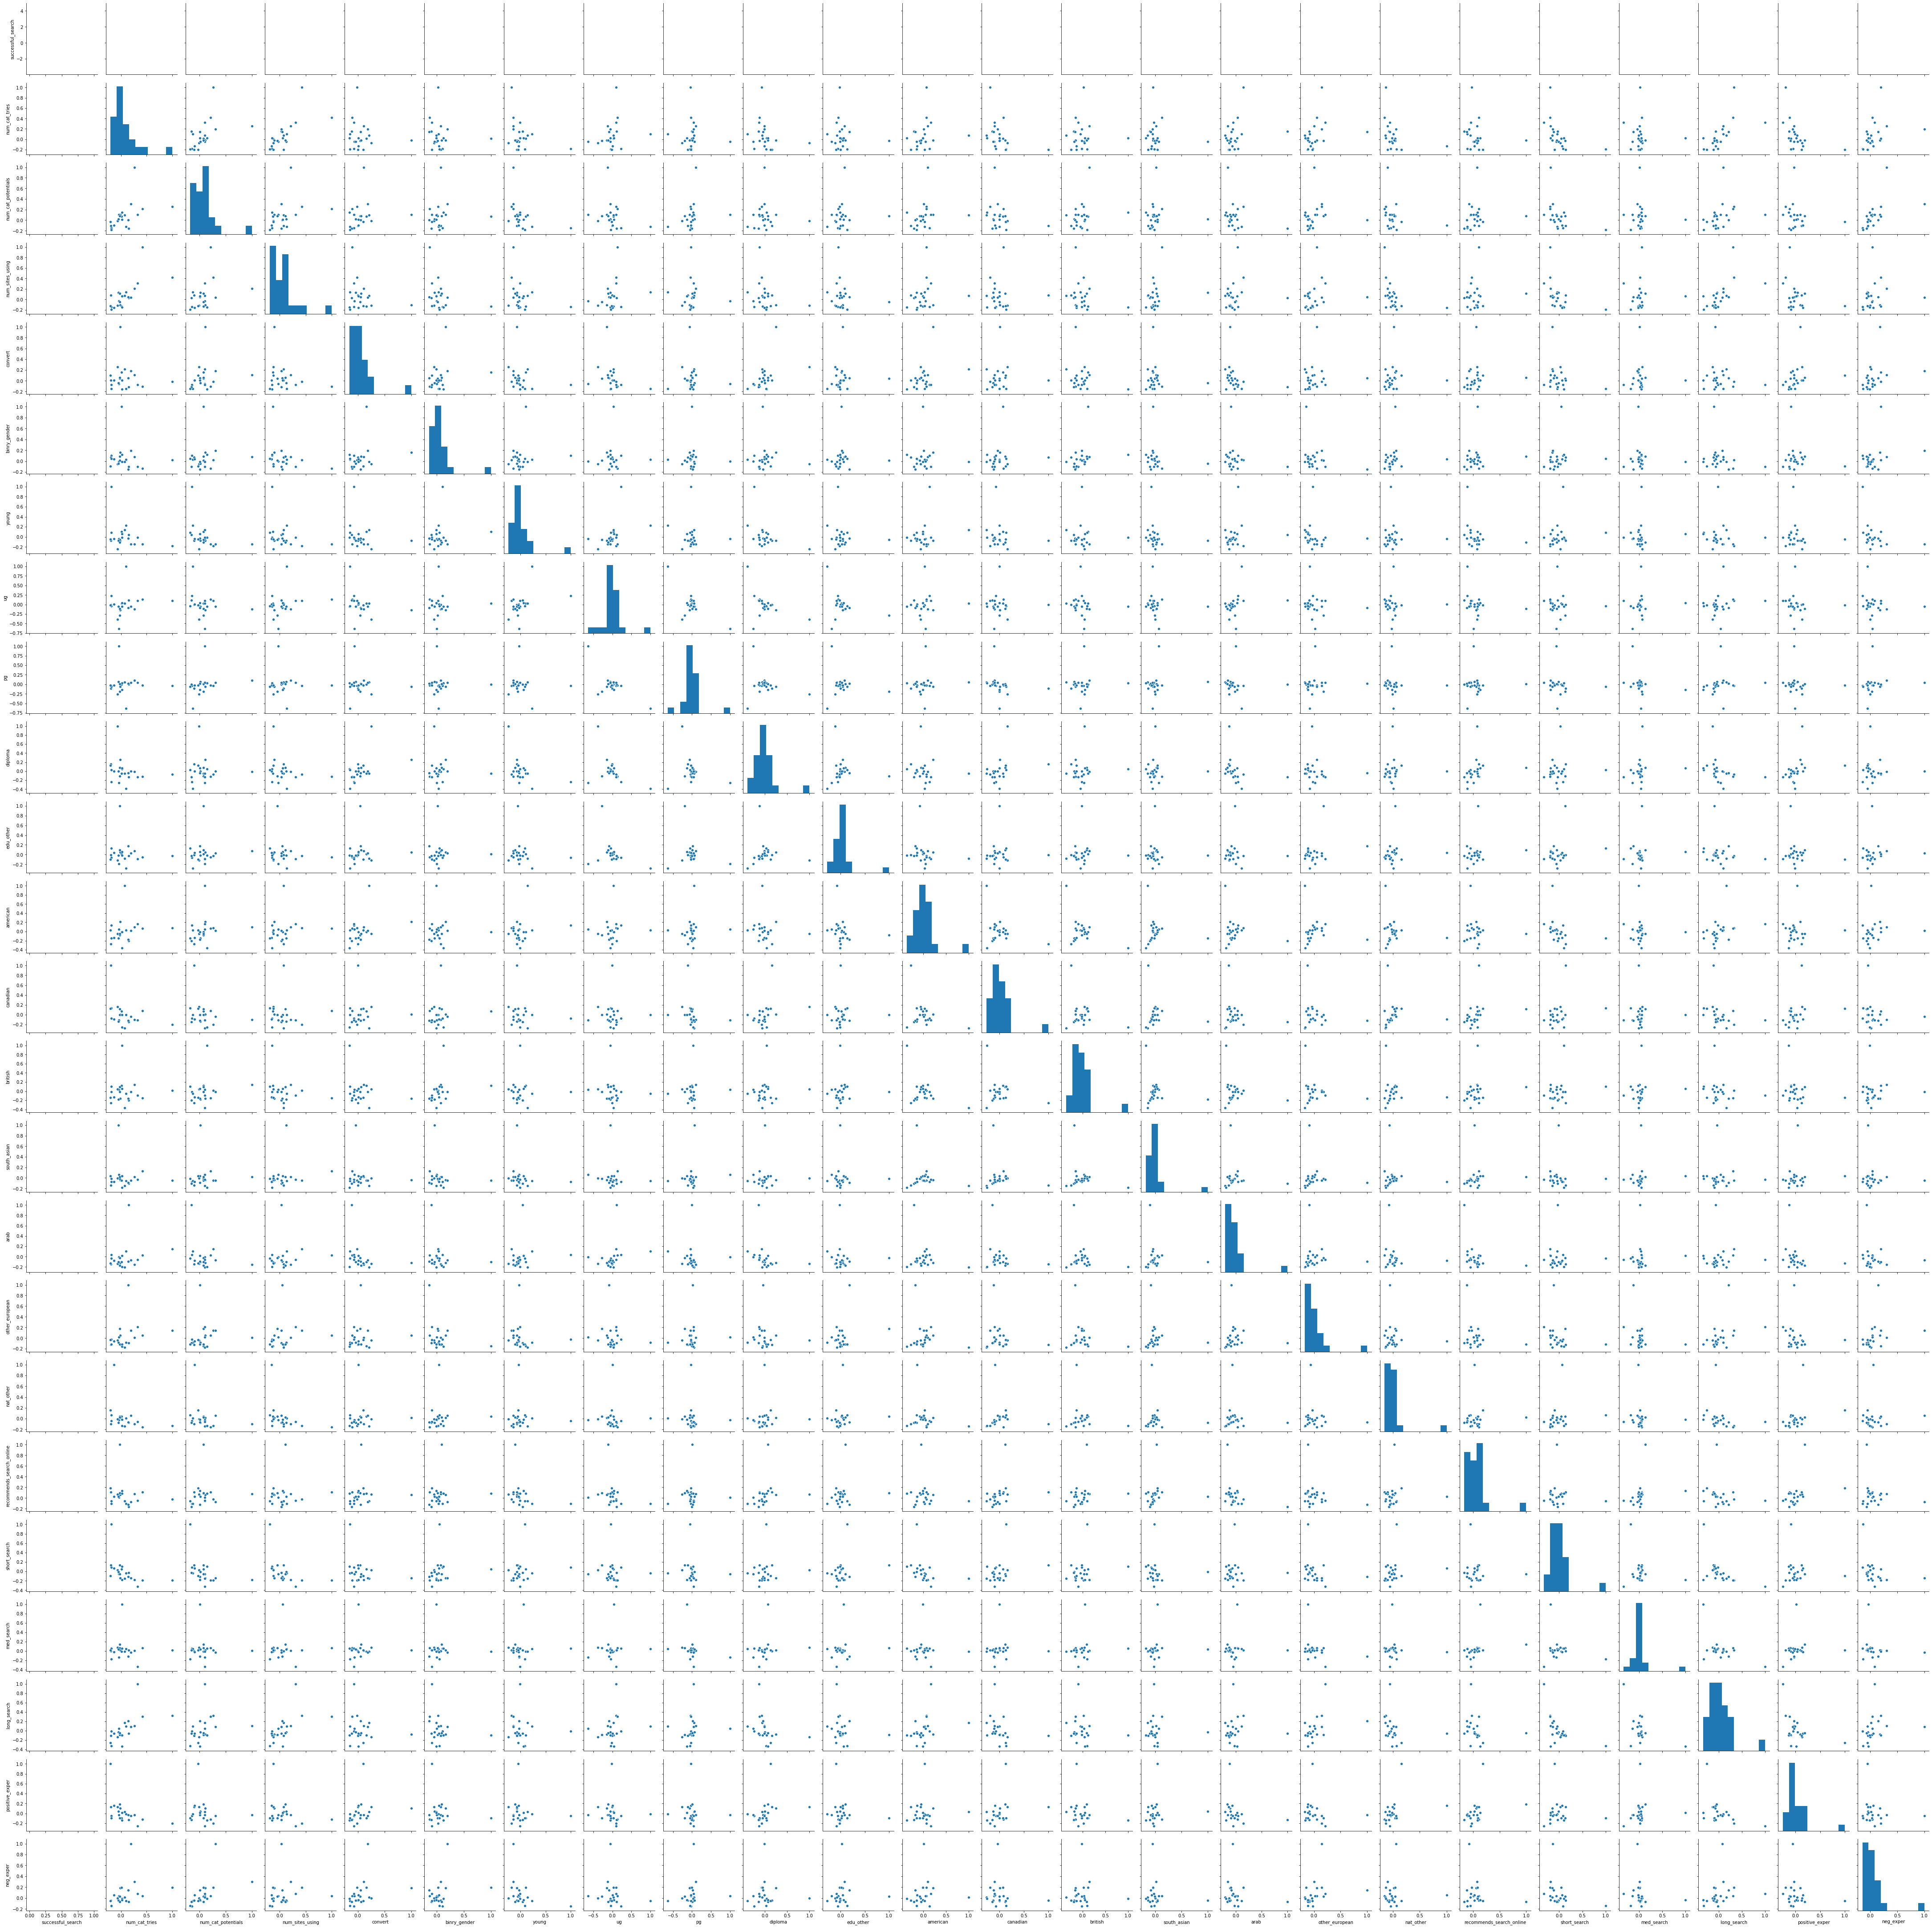

<function __main__.plot_correlation(data)>

In [152]:
#  plot correlation's scatter plots to explore dependency between features 

def plot_correlation(data):

    # init figure size
   # rcParams['figure.figsize'] = 15, 20
    fig = plt.figure(figsize=(15, 15))
    #sns.heatmap(data.corr(), annot=True, fmt=".2f")
    sns.pairplot(data.select_dtypes(include=['int', 'float64', 'uint8']).corr())
    plt.show()

print (plot_correlation)
# plot correlation & densities
#X = X.select_dtypes(include=['int', 'float64', 'uint8'])
plot_correlation(df[['successful_search','num_cat_tries', 'num_cat_potentials', 'num_sites_using', 'convert', 'binry_gender','young','ug','pg','diploma', 'edu_other', 'american', 'canadian', 'british','south_asian','arab','other_european', 'nat_other','recommends_search_online','short_search', 'med_search','long_search', 'positive_exper', 'neg_exper']])
#plot_correlation(df[['successful_search','diploma','succ_muzmatch', 'succ_pur_matri', 'succ_other',  'succ_short_search', 'succ_med_search', 'citizens', 'live_together','practice_match', 'age_match','young_nikkah','num_potentials' ]])

plot_correlation


In [180]:
df.head()

,num_tries,cat_tries,num_cat_tries,duration_search,short_search,med_search,long_search,num_sites_using,recommends_searching_online,recommends_search_online,app_recommendations,app_recommendations1,app_recommendations2,app_recommendations3,num_potentials,cat_potentials,num_cat_potentials,positive_exper,sexting_asked,felt_blackmailed,asked_for_money,neg_exper,muslim,convert,convert_years,...,div_factor_pers,div_factor_prac_mismatch,div_factor_interfere,div_factor_distance,div_factor_other,country_of_origin1,american,british,canadian,south_asian,arab,other_european,nat_other,country_of_origin2,country_of_origin3,gender,binry_gender,age_now,young,educational_level,ug,pg,diploma,edu_other,successful_search
Unique Response Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
579279-579270-56995542,1,One,1,No longer searching,0,0,0,1,"Yes, 100%",1,NaN,NaN,NaN,NaN,3,2 to 3,2,0,Yes,No,No,1,Not yet Muslim,0,NaN,...,0,0,0,0,0,Rwanda,0,0,0,0,0,0,0,NaN,NaN,Female,1,31 to 40,0,University - undergraduate degree,1,0,0,0,NaN
579279-579270-63891038,2,Two,2,No longer searching,0,0,0,1,"No, except in certain cases",0,NaN,NaN,NaN,NaN,1,One,1,0,Yes,Yes,No,1,Other,1,1.0,...,0,0,0,0,0,USA,1,0,0,0,0,0,0,NaN,NaN,Female,1,21 to 30,1,University - undergraduate degree,1,0,0,0,NaN
579279-579270-63912357,6,6 to 9,5,0 to 30 days,1,0,0,2,"Yes, but with caution",1,NaN,NaN,NaN,NaN,2,2 to 3,2,0,No,No,No,0,All my life,0,NaN,...,1,1,1,0,1,UK,0,1,0,0,0,0,0,NaN,NaN,Female,1,31 to 40,0,University - undergraduate degree,1,0,0,0,NaN
579279-579270-56999514,1,One,1,No longer searching,0,0,0,3,"Yes, but with caution",1,MuzMatch,Muzmatch,NaN,NaN,3,2 to 3,2,0,Yes,No,Yes,1,All my life,0,NaN,...,0,0,0,0,0,Canada,0,0,1,0,0,0,0,NaN,NaN,Female,1,41 to 50,0,University - graduate degree (Masters),0,1,0,0,NaN
579279-579270-62818814,4,4 to 5,4,No longer searching,0,0,0,1,"Yes, but with caution",1,Muzmatch,Muzmatch,NaN,NaN,5,4 to 5,3,0,No,No,No,0,All my life,0,NaN,...,0,0,0,0,0,UK,0,1,0,0,0,0,0,NaN,NaN,Female,1,21 to 30,1,University - undergraduate degree,1,0,0,0,NaN


In [197]:
#  plot correlation's matrix to explore dependency between features for Successful Searches
# df["successful_search"] = data.target
# X = df.drop("successful_search",1)   #Feature Matrix
y = df["successful_search"]          #Target Variable
# #cor = data.corr()

#def plot_correlation(data):

    # init figure size
# #     rcParams['figure.figsize'] = 15, 20
#     fig = plt.figure(figsize=(15, 15))
   
#     sns.heatmap(data.corr(), annot=True, fmt=".2f", cbar_kws= {'orientation': 'horizontal'})
#     #sns.pairplot(data.corr())
#     plt.show()


# # plot correlation & densities
# plot_correlation(df[['successful_search','num_tries','convert',  'num_sites_using', 'num_potentials','gender','young','edu_level_0','edu_level_1','edu_level_2', 'edu_level_3', 'edu_level_4', 'edu_level_5', 'edu_level_6','recommends_search_online','duration_search_0 to 30 days', 'duration_search_1 to 3 months','duration_search_4 to 12 months', 'duration_search_1 to 2 years', 'duration_search_3 to 5 years', 'duration_search_Over 5 years','sexting', 'blackmail', 'money', 'mar_status_during_search' ]])

#Using Pearson Correlation
#plt.figure(figsize=(12,10))
cor1 = df[['successful_search','convert', 'binry_gender','young','ug','pg','diploma', 'edu_other', 'american', 'canadian', 'british','south_asian','arab','other_european', 'nat_other','recommends_search_online','short_search', 'med_search','long_search', 'positive_exper', 'neg_exper', 'single_during_search',  'num_cat_tries', 'num_sites_using','num_cat_potentials'  ]].corr()
cor = df[['successful_search','diploma','succ_muzmatch', 'succ_pur_matri', 'succ_other',  'succ_short_search', 'succ_med_search', 'citizens', 'live_together','practice_match', 'age_match','young_nikkah','num_cat_potentials' ]].corr()
cor3 = df[['successful_search','convert' ,'num_sites_using','num_cat_tries','num_cat_potentials', 'binry_gender','young','ug','pg','diploma', 'edu_other', 'american', 'canadian', 'british','south_asian','arab','other_european', 'nat_other','recommends_search_online','short_search', 'med_search','long_search', 'positive_exper', 'neg_exper', 'single_during_search']]
cor4 = df[['successful_search','short_nikkah', 'med_nikkah', 'long_nikkah', 'succ_short_search','succ_med_search', 'succ_long_search', 'succ_muzmatch', 'succ_single_muslim','succ_muslima','succ_other', 'succ_pur_matri','single_during_search','citizens','live_together','ethnicity_match', 'education_match','practice_match', 'age_match', 'young_nikkah', 'div_factor_pers','div_factor_prac_mismatch', 'div_factor_interfere','div_factor_distance', 'div_factor_other', 'diploma','ug', 'pg', 'edu_other', 'binry_gender', 'american', 'canadian', 'british', 'south_asian', 'other_european','nat_other','arab','convert']]
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()
#cor
cor1



,successful_search,convert,binry_gender,young,ug,pg,diploma,edu_other,american,canadian,british,south_asian,arab,other_european,nat_other,recommends_search_online,short_search,med_search,long_search,positive_exper,neg_exper,single_during_search,num_cat_tries,num_sites_using,num_cat_potentials
successful_search,1.000000,0.335115,0.074637,-0.233688,-0.150358,-0.013180,0.216679,0.025890,0.006396,0.080534,-0.014134,0.071656,-0.066339,-0.104140,0.000500,0.130410,-0.055905,-0.110904,-0.183147,0.154500,0.057150,-0.218822,-0.012732,-0.017655,0.184952
convert,0.335115,1.000000,0.161554,-0.075293,-0.143297,-0.059836,0.254543,0.044297,0.213791,0.006505,-0.157656,-0.040308,-0.115465,0.053913,0.013362,0.059836,-0.143859,0.012268,-0.071834,0.101456,0.182569,-0.191685,-0.016299,-0.107341,0.107044
binry_gender,0.074637,0.161554,1.000000,0.104264,0.029469,-0.002755,-0.050545,0.014516,-0.011953,0.066794,0.122623,-0.045510,-0.098919,-0.147995,0.038530,0.084913,0.045465,-0.013401,-0.098297,-0.094288,0.196559,-0.120804,0.016715,-0.132011,0.074163
young,-0.233688,-0.075293,0.104264,1.000000,0.228974,-0.034462,-0.240799,-0.060234,0.134676,-0.077295,-0.015945,-0.075702,0.040278,-0.026440,-0.041788,-0.107588,0.082593,0.055607,-0.011931,-0.049755,-0.146123,0.371211,-0.184045,-0.144177,-0.145556
ug,-0.150358,-0.143297,0.029469,0.228974,1.000000,-0.638251,-0.385332,-0.280257,0.031583,-0.003251,-0.050667,-0.053209,0.108303,-0.084012,0.006598,-0.109733,-0.037689,0.045435,0.096333,-0.013517,-0.049134,0.181676,0.098635,0.136697,-0.127111
pg,-0.013180,-0.059836,-0.002755,-0.034462,-0.638251,1.000000,-0.260935,-0.189781,0.052262,-0.110754,0.030297,0.066783,-0.005579,0.019007,-0.025143,0.010967,-0.056074,-0.137415,0.044816,-0.027199,0.041416,0.101623,-0.041926,-0.030813,0.101399
diploma,0.216679,0.254543,-0.050545,-0.240799,-0.385332,-0.260935,1.000000,-0.114577,-0.053783,0.156628,0.045482,-0.002513,-0.132736,-0.042541,-0.007213,0.072964,0.029049,0.069904,-0.131990,0.130681,-0.004851,-0.254543,-0.068950,-0.120142,-0.010089
edu_other,0.025890,0.044297,0.014516,-0.060234,-0.280257,-0.189781,-0.114577,1.000000,-0.080057,-0.004662,-0.015687,-0.012012,-0.022716,0.179570,0.040218,0.093030,0.129904,0.061546,-0.088037,-0.095953,0.027051,-0.188262,-0.024050,-0.048708,0.076715
american,0.006396,0.213791,-0.011953,0.134676,0.031583,0.052262,-0.053783,-0.080057,1.000000,-0.270649,-0.362592,-0.147275,-0.207573,-0.171597,-0.138357,-0.052262,-0.147027,-0.008447,0.168829,0.031872,0.014497,0.128680,0.073581,0.072523,0.099668
canadian,0.080534,0.006505,0.066794,-0.077295,-0.003251,-0.110754,0.156628,-0.004662,-0.270649,1.000000,-0.254734,-0.136089,-0.145828,-0.120553,-0.097201,0.110754,0.136737,-0.006886,-0.107371,0.128135,-0.043456,-0.058858,-0.197945,0.078245,-0.104721


In [191]:
#Correlation with output variable
cor_target1 = abs(cor1["successful_search"])
#Selecting highly correlated features
relevant_features = cor_target1[cor_target1>0.25]
relevant_features

successful_search    1.000000
convert              0.335115
Name: successful_search, dtype: float64

In [192]:
#Correlation with output variable
cor_target = abs(cor["successful_search"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

successful_search    1.000000
succ_muzmatch        0.551839
succ_pur_matri       0.290521
succ_other           0.549741
succ_short_search    0.664102
succ_med_search      0.413342
citizens             0.639309
live_together        0.708913
practice_match       0.674684
age_match            0.769024
young_nikkah         0.774476
Name: successful_search, dtype: float64

In [195]:
pd.options.display.max_rows = 4000
youngN = pd.crosstab(df.young_nikkah, df.successful_search, margins=True)
age = pd.crosstab(df.age_match, df.successful_search, margins=True)
shortSN = pd.crosstab(df.short_nikkah, df.successful_search, margins=True)
live = pd.crosstab(df.live_together, df.successful_search, margins=True)
prac = pd.crosstab(df.practice_match, df.successful_search, margins=True)
cit = pd.crosstab(df.citizens, df.successful_search, margins=True)
other_app = pd.crosstab(df.succ_other, df.successful_search, margins=True)
muz = pd.crosstab(df.succ_muzmatch, df.successful_search, margins=True)
medN = pd.crosstab(df.med_nikkah, df.successful_search, margins=True)
con = pd.crosstab(df.convert, df.successful_search, margins=True)
pmatri = pd.crosstab(df.succ_pur_matri, df.successful_search, margins=True)
yung = pd.crosstab(df.young, df.successful_search, margins=True)
single = pd.crosstab(df.single_during_search, df.successful_search, margins=True)
dip = pd.crosstab(df.diploma, df.successful_search, margins=True)
lsearch = pd.crosstab(df.long_search, df.successful_search, margins=True)
pot = pd.crosstab(df.cat_potentials, df.successful_search, margins=True)
pos = pd.crosstab(df.positive_exper, df.successful_search, margins=True)
recommendsSO = pd.crosstab(df.recommends_searching_online, df.successful_search, margins=True)
ug = pd.crosstab(df.ug, df.successful_search, margins=True)
msearch = pd.crosstab(df.med_search, df.successful_search, margins=True)
otherEU = pd.crosstab(df.other_european, df.successful_search, margins=True)
gen = pd.crosstab(df.gender, df.successful_search, margins=True)
neg = pd.crosstab(df.neg_exper, df.successful_search, margins=True)
can = pd.crosstab(df.canadian, df.successful_search, margins=True)
arabic = pd.crosstab(df.arab, df.successful_search, margins=True)
asia = pd.crosstab(df.south_asian, df.successful_search, margins=True)
ssearch = pd.crosstab(df.short_search, df.successful_search, margins=True)
tries = pd.crosstab(df.cat_tries, df.successful_search, margins=True)
sites = pd.crosstab(df.num_sites_using, df.successful_search, margins=True)
pg = pd.crosstab(df.pg, df.successful_search, margins=True)
brit = pd.crosstab(df.british, df.successful_search, margins=True)
amer = pd.crosstab(df.american, df.successful_search, margins=True)
otherE = pd.crosstab(df.edu_other, df.successful_search, margins=True)



total_dur_search = pd.concat([youngN, age,shortSN,live,prac,cit, other_app, muz, medN, con,pmatri, yung, single, dip, lsearch, pot, pos, recommendsSO, ug, msearch, otherEU, gen, neg, can, arabic, asia, ssearch, tries, sites, pg, brit, amer, otherE ], axis=0)
total_dur_search

successful_search,0,1,All
0,145,5,150
1,3,16,19
All,148,21,169
0,143,0,143
1,2,12,14
2,2,3,5
3,1,6,7
All,148,21,169
0,147,14,161
1,1,7,8


In [196]:
df['gender'].value_counts()

Female    113
Male       56
Name: gender, dtype: int64

In [56]:
pd.crosstab(df.gender, df.successful_search, margins=True)

successful_search,0,1,All
gender,,,
Female,96,17,113
Male,51,5,56
All,147,22,169


In [90]:
df['mar_status_derived'].value_counts()

2    132
3     20
1     17
Name: mar_status_derived, dtype: int64

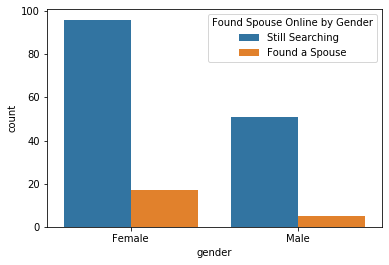

In [57]:

nikkah_result = df.query('successful_search == "1"')
still_searching = df.query('successful_search == "0"')

nikkah_result = sns.countplot(data=df, x = 'gender', hue='successful_search')

plt.legend(title='Found Spouse Online by Gender', labels=['Still Searching', 'Found a Spouse'])


plt.show(nikkah_result)

In [112]:
#df[[ "convert", "mar_status_derived", "duration_search_nikkah", "gender"]].groupby ("convert").count()#.reset_index(name ="Duration of Search until Spouse Found")
convert = df.query('convert == "1"')
raised_muslim = df.query('convert == "0"')

table =  df.pivot_table(values='mar_status_when_searching', index=df.index,  columns=['duration_search'], aggfunc='first')

table.head()
# table2 = table.groupby('0 to 30 days')['0 to 30 days'].unique()

# table2.head()

# table3 = df.groupby('mar_status_derived')['mar_status_derived'].count()
# table3.head()
mar_stat_df= table.apply(pd.Series.value_counts)
# table.loc ['convert']
mar_stat_df


duration_search,0 to 30 days,1 to 2 years,1 to 3 months,3 to 5 years,4 to 12 months,No longer searching,Over 5 years
Single,13,26,8,25,21,48,8
Divorcee,1,1,3,3,5,4,1


In [113]:
#df[[ "convert", "mar_status_derived", "duration_search_nikkah", "gender"]].groupby ("convert").count()#.reset_index(name ="Duration of Search until Spouse Found")
convert = df.query('convert == "1"')
raised_muslim = df.query('convert == "0"')

table1 =  df.pivot_table(values='muslim', index=df.index,  columns=['duration_search'], aggfunc='first')

table1.head()
# table2 = table.groupby('0 to 30 days')['0 to 30 days'].unique()

# table2.head()

# table3 = df.groupby('mar_status_derived')['mar_status_derived'].count()
# table3.head()
convert_df=table1.apply(pd.Series.value_counts)
# table.loc ['convert']

convert_df


duration_search,0 to 30 days,1 to 2 years,1 to 3 months,3 to 5 years,4 to 12 months,No longer searching,Over 5 years
All my life,14.0,25.0,11.0,26.0,23.0,41,8.0
Not yet Muslim,NaN,NaN,NaN,NaN,NaN,1,NaN
Other,NaN,2.0,NaN,2.0,3.0,10,1.0


In [124]:
# df1 =  pd.crosstab(a, [b, c], rownames=['Marital Status'], colnames=['0 to 30 days', '1 to 2 years'])
# df2 =  pd.crosstab(d, [b, c], rownames=['Religious Naturalization'], colnames=['0 to 30 days', '1 to 2 years'])
convert_df1 = pd.crosstab(df.convert, df.duration_search, margins=True)
mar_stat_df1 = pd.crosstab(df.mar_status_when_searching, df.duration_search, margins=True)
total_dur_search = pd.concat([mar_stat_df1, convert_df1], axis=0)
total_dur_search #= total_dur_search.groupby ("Single").count()

duration_search,0 to 30 days,1 to 2 years,1 to 3 months,3 to 5 years,4 to 12 months,No longer searching,Over 5 years,All
Divorcee,1,1,3,3,5,4,1,18
Single,13,26,8,25,21,48,8,149
All,14,27,11,28,26,52,9,167
0,14,25,11,26,23,42,8,149
1,0,2,0,2,3,10,1,18
All,14,27,11,28,26,52,9,167


In [184]:
df['num_tries'].describe()

count    169.000000
mean       6.295858
std       14.786417
min        1.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       99.000000
Name: num_tries, dtype: float64

In [163]:
df['cat_tries'].value_counts()

One          56
Three        35
10 and up    23
Two          21
4 to 5       18
6 to 9       16
Name: cat_tries, dtype: int64

In [59]:
pd.crosstab(df.ug, df.successful_search, margins=True)

successful_search,0,1,All
ug,,,
0,72,15,87
1,75,7,82
All,147,22,169


In [10]:
pd.crosstab(df.diploma, df.successful_search, margins=True)

successful_search,0,1,All
diploma,,,
0,131,15,146
1,16,7,23
All,147,22,169


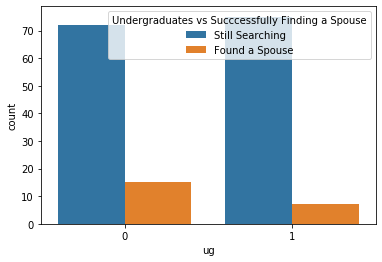

In [58]:
nikkah_result = df.query('successful_search == "1"')
still_searching = df.query('successful_search == "0"')

nikkah_result = sns.countplot(data=df, x = 'ug', hue='successful_search')

plt.legend(title='Undergraduates vs Succcessfully Finding a Spouse', labels=['Still Searching', 'Found a Spouse'])


plt.show(nikkah_result)

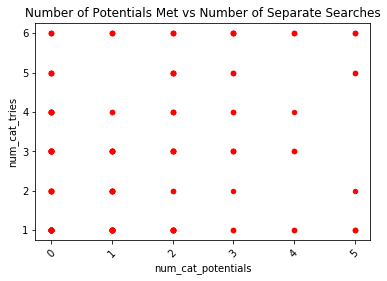

In [164]:
# creating a scatter plot - didn't work

df['num_cat_tries'] = df[{'num_cat_tries', 'num_cat_potentials'}].plot(kind = 'scatter', 
        x = 'num_cat_potentials', 
        y = 'num_cat_tries',
        color = 'red') 

# formatting the x-axis
plt.xticks(rotation=45)


# set the title 
plt.title('Number of Potentials Met vs Number of Separate Searches') 


# show the plot 
plt.show() 

NameError: name 'StrMethodFormatter' is not defined

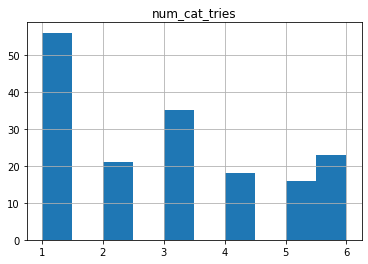

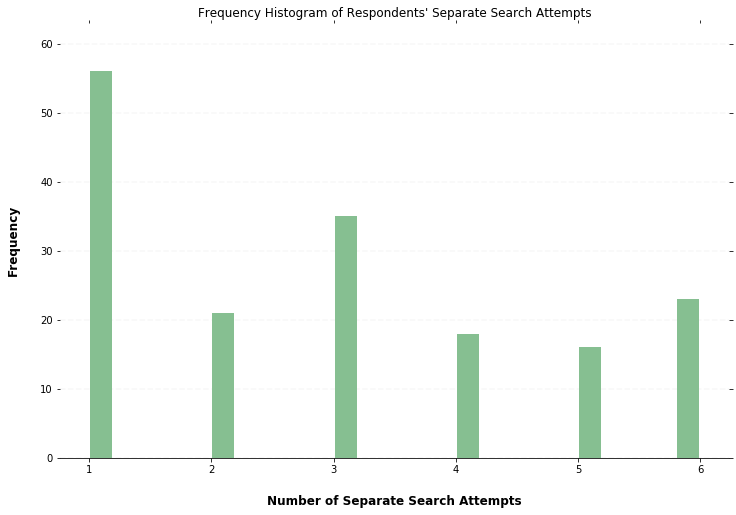

In [52]:
df.hist(column='num_cat_tries')



ax = df.hist(column='num_cat_tries', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Create title
    x.set_title("Frequency Histogram of Respondents' Separate Search Attempts")

    # Set x-axis label
    x.set_xlabel("Number of Separate Search Attempts", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [69]:
df['num_sites_using'].value_counts()

1     55
3     47
2     43
4     10
5      7
6      4
10     1
8      1
7      1
Name: num_sites_using, dtype: int64

In [185]:
df['num_sites_using'].describe()

count    169.000000
mean       2.402367
std        1.477286
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: num_sites_using, dtype: float64

In [34]:
pd.crosstab(df.num_sites_using, df.successful_search, margins=True)

successful_search,0,1,All
num_sites_using,,,
1,49,6,55
2,37,6,43
3,38,9,47
4,10,0,10
5,6,1,7
6,4,0,4
7,1,0,1
8,1,0,1
10,1,0,1


In [185]:
df['num_sites_using'].describe()

count    169.000000
mean       2.402367
std        1.477286
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: num_sites_using, dtype: float64

In [276]:
df['app_success'].value_counts()

Muzmatch               7
Undetermined           3
Muslima                2
Pure Matrimony         2
Single Muslim          2
Islamicmarriage.com    1
Reddit                 1
Shaadi                 1
Doongle                1
Facebook               1
Half Our Deen          1
Name: app_success, dtype: int64

In [186]:
df['num_potentials'].describe()

count    169.000000
mean       2.366864
std        4.175648
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       35.000000
Name: num_potentials, dtype: float64

In [165]:
df['cat_potentials'].value_counts()

None        62
One         40
2 to 3      33
4 to 5      17
9 and up     9
6 to 8       8
Name: cat_potentials, dtype: int64

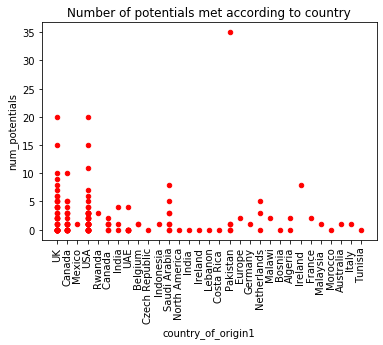

In [71]:
# creating a scatter plot

df['num_potentials'] = df[{'num_potentials', 'country_of_origin1'}].plot(kind = 'scatter', 
        x = 'country_of_origin1', 
        y = 'num_potentials',
        color = 'red') 

# formatting the x-axis
plt.xticks(rotation=90)


# set the title 
plt.title('Number of potentials met according to country') 


# show the plot 
plt.show() 

In [55]:
pd.crosstab(df.cat_potentials, df.successful_search, margins=True)

successful_search,0,1,All
cat_potentials,,,
2 to 3,30,3,33
4 to 5,10,7,17
6 to 8,7,1,8
9 and up,8,1,9
None,62,0,62
One,30,10,40
All,147,22,169


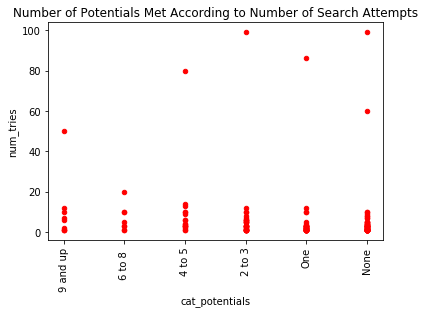

In [54]:
# creating a scatter plot

df['num_tries'] = df[{'num_tries', 'cat_potentials'}].plot(kind = 'scatter', 
        x = 'cat_potentials', 
        y = 'num_tries',
        color = 'red') 

# formatting the x-axis
plt.xticks(rotation=90)


# set the title 
plt.title('Number of Potentials Met According to Number of Search Attempts') 


# show the plot 
plt.show() 

In [91]:
df['country_of_origin1'].value_counts()

USA               46
UK                43
Canada            24
Saudi Arabia       8
UAE                7
Canada             6
Pakistan           5
Netherlands        3
India              3
Belgium            2
Algeria            2
Australia          1
Morocco            1
Rwanda             1
India              1
Malawi             1
Lebanon            1
Italy              1
Europe             1
Tunisia            1
France             1
Indonesia          1
Malaysia           1
Germany            1
Mexico             1
Czech Republic     1
Costa Rica         1
North America      1
Bosnia             1
Ireland            1
Ireland            1
Name: country_of_origin1, dtype: int64

In [72]:
pd.crosstab(df.country_of_origin1, df.gender, margins=True)

gender,Female,Male,All
country_of_origin1,,,
Algeria,1,1,2
Australia,1,0,1
Belgium,1,1,2
Bosnia,0,1,1
Canada,19,5,24
Canada,4,2,6
Costa Rica,1,0,1
Czech Republic,1,0,1
Europe,0,1,1


In [73]:
pd.crosstab(df.country_of_origin1, df.age_now, margins=True)

age_now,16 to 20,21 to 30,31 to 40,41 to 50,51 to 60,61 to 70,All
country_of_origin1,,,,,,,
Algeria,0,2,0,0,0,0,2
Australia,0,1,0,0,0,0,1
Belgium,0,2,0,0,0,0,2
Bosnia,0,1,0,0,0,0,1
Canada,1,14,3,4,1,1,24
Canada,0,4,1,1,0,0,6
Costa Rica,0,1,0,0,0,0,1
Czech Republic,0,0,0,1,0,0,1
Europe,0,1,0,0,0,0,1


In [74]:
pd.crosstab(df.app_recommendations1, df.country_of_origin1, margins=True)

country_of_origin1,Algeria,Australia,Belgium,Bosnia,Canada,Canada,Costa Rica,India,India,Indonesia,Ireland,Ireland,Malaysia,Netherlands,Pakistan,Saudi Arabia,UAE,UK,USA,All
app_recommendations1,,,,,,,,,,,,,,,,,,,,
Dil Mil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
Facebook,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
Half Our Deen,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,4
Hinge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2
Hinge,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Islamicmarriage.com,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
Minder,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,3,5
Muslim Matrimonal,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Muslima,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3


In [7]:
pd.crosstab(df.educational_level, df.successful_search, margins=True)

successful_search,0,1,All
educational_level,,,
College diploma or certificate,16,7,23
None of the above,0,1,1
Secondary/high school diploma or certificate,5,0,5
Some college or university - didn't finish,6,1,7
University - graduate degree (Masters),41,6,47
University - graduate degree (PhD),4,0,4
University - undergraduate degree,75,7,82
All,147,22,169


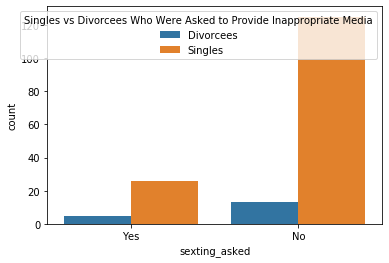

In [65]:
sexting_marital_status = sns.countplot(data=df, x = 'sexting_asked', hue='mar_status_when_searching')

plt.legend(title='Singles vs Divorcees Who Were Asked to Provide Inappropriate Media', labels=['Divorcees', 'Singles'])
plt.show(sexting_marital_status)

In [9]:
pd.crosstab(df.mar_status_when_searching, df.successful_search, margins=True)

successful_search,0,1,All
mar_status_when_searching,,,
Divorcee,12,6,18
Single,135,16,151
All,147,22,169


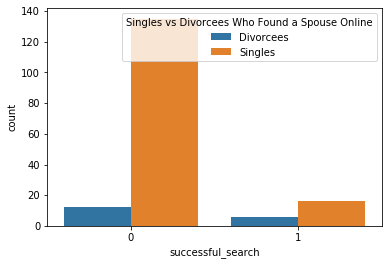

In [8]:
nikkah_result_div = sns.countplot(data=df, x = 'successful_search', hue='mar_status_when_searching')

plt.legend(title='Singles vs Divorcees Who Found a Spouse Online', labels=['Divorcees', 'Singles'])
plt.show(nikkah_result_div)

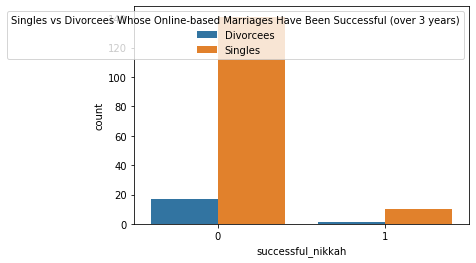

In [83]:
nikkah_success = sns.countplot(data=df, x = 'successful_nikkah', hue='mar_status_when_searching')

plt.legend(title='Singles vs Divorcees Whose Online-based Marriages Have Been Successful (over 3 years)', labels=['Divorcees', 'Singles'])
plt.show(nikkah_success)


# nikkah_success = df.query('successful_nikkah == "1"')
# undetermined_nikkah_success = df.query('successful_nikkah == "0"')
# sns.countplot(data=nikkah_success, x = 'convert')


In [11]:
pd.crosstab(df.mar_status_when_searching, df.successful_nikkah, margins=True)

successful_nikkah,0,1,All
mar_status_when_searching,,,
Divorcee,17,1,18
Single,141,10,151
All,158,11,169


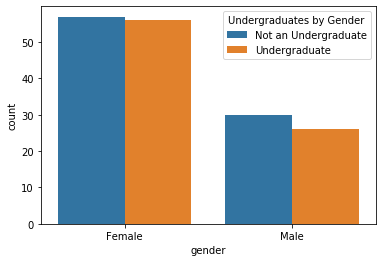

In [86]:
undergrads = sns.countplot(data=df, x = 'gender', hue='ug')

plt.legend(title='Undergraduates by Gender', labels=['Not an Undergraduate', 'Undergraduate'])
plt.show(undergrads)


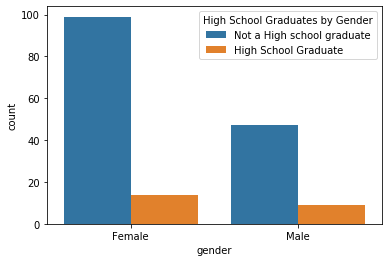

In [88]:
diploma = sns.countplot(data=df, x = 'gender', hue='diploma')

plt.legend(title='High School Graduates by Gender', labels=['Not a High school graduate', 'High School Graduate'])
plt.show(diploma)


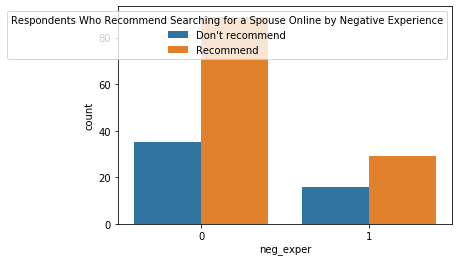

In [90]:
sexting_attitude_online = sns.countplot(data=df, x = 'neg_exper', hue='recommends_search_online')

plt.legend(title='Respondents Who Recommend Searching for a Spouse Online by Negative Experience', labels=['Don\'t recommend', 'Recommend'])
plt.show(sexting_attitude_online)

# Visualisation About Converts

In [91]:
df['convert'].value_counts()

0    151
1     18
Name: convert, dtype: int64

In [183]:
df['convert_years'].describe()


count    18.000000
mean      9.777778
std       9.084930
min       1.000000
25%       3.000000
50%       8.000000
75%      14.250000
max      30.000000
Name: convert_years, dtype: float64

NameError: name 'StrMethodFormatter' is not defined

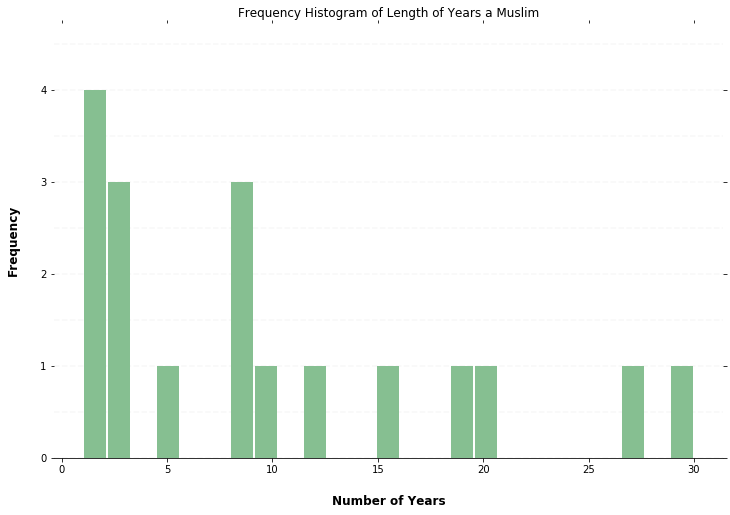

In [177]:
ax = df.hist(column='convert_years', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Create title
    x.set_title("Frequency Histogram of Length of Years a Muslim")

    # Set x-axis label
    x.set_xlabel("Number of Years", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [109]:
convert_df1 = pd.crosstab(df.muslim, df.duration_search, margins=True)
convert_df1

duration_search,0 to 30 days,1 to 2 years,1 to 3 months,3 to 5 years,4 to 12 months,No longer searching,Over 5 years,All
muslim,,,,,,,,
All my life,14,25,11,26,23,41,8,148
Not yet Muslim,0,0,0,0,0,1,0,1
Other,0,2,0,2,3,10,1,18
All,14,27,11,28,26,52,9,167


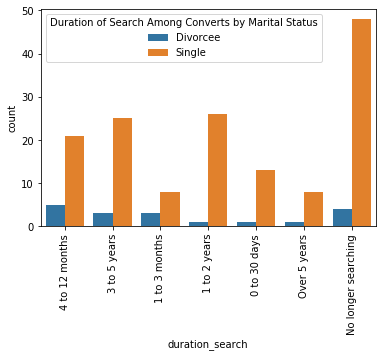

In [92]:
convert = df.query('convert == "1"')
raised_muslim = df.query('convert == "0"')

convert = sns.countplot(data=df, x = 'duration_search', hue='single_during_search')

plt.legend(title= 'Duration of Search Among Converts by Marital Status', labels=['Divorcee', 'Single'])

# formatting the x-axis
plt.xticks(rotation=90)

plt.show(convert)



In [110]:
pd.crosstab(df.muslim, df.cat_potentials, margins=True)

cat_potentials,2 to 3,4 to 5,6 to 8,9 and up,None,One,All
muslim,,,,,,,
All my life,30,12,6,9,59,34,150
Not yet Muslim,1,0,0,0,0,0,1
Other,2,5,2,0,3,6,18
All,33,17,8,9,62,40,169


In [185]:
df['num_sites_using'].describe()

count    169.000000
mean       2.402367
std        1.477286
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: num_sites_using, dtype: float64

In [95]:
pd.crosstab(df.sexting_asked, df.convert, margins=True)

convert,0,1,All
sexting_asked,,,
No,127,11,138
Yes,24,7,31
All,151,18,169


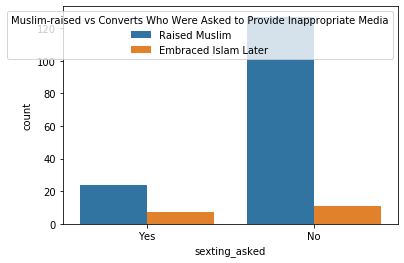

In [94]:
sexting_converts = sns.countplot(data=df, x = 'sexting_asked', hue='convert')

plt.legend(title='Muslim-raised vs Converts Who Were Asked to Provide Inappropriate Media', labels=['Raised Muslim', 'Embraced Islam Later'])
plt.show(sexting_converts)

In [12]:
pd.crosstab(df.convert, df.successful_search, margins=True)

successful_search,0,1,All
convert,,,
0,137,14,151
1,10,8,18
All,147,22,169


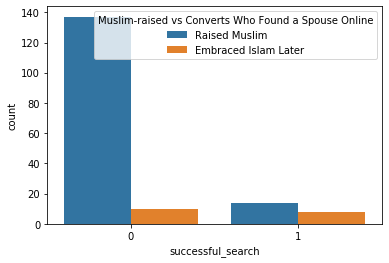

In [13]:
nikkah_result = sns.countplot(data=df, x = 'successful_search', hue='convert')

plt.legend(title='Muslim-raised vs Converts Who Found a Spouse Online', labels=['Raised Muslim', 'Embraced Islam Later'])
plt.show(nikkah_result)


In [14]:
pd.crosstab(df.convert, df.successful_nikkah, margins=True)

successful_nikkah,0,1,All
convert,,,
0,146,5,151
1,12,6,18
All,158,11,169


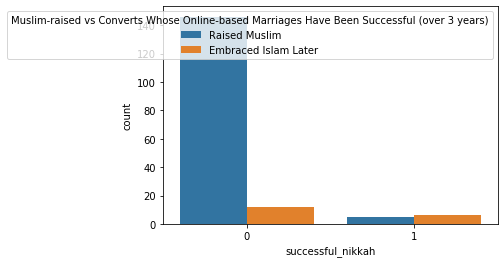

In [98]:
nikkah_success = sns.countplot(data=df, x = 'successful_nikkah', hue='convert')

plt.legend(title='Muslim-raised vs Converts Whose Online-based Marriages Have Been Successful (over 3 years)', labels=['Raised Muslim', 'Embraced Islam Later'])
plt.show(nikkah_success)


# nikkah_success = df.query('successful_nikkah == "1"')
# undetermined_nikkah_success = df.query('successful_nikkah == "0"')
# sns.countplot(data=nikkah_success, x = 'convert')


In [100]:
pd.crosstab(df.educational_level, df.convert, margins=True)

convert,0,1,All
educational_level,,,
College diploma or certificate,16,7,23
None of the above,1,0,1
Secondary/high school diploma or certificate,5,0,5
Some college or university - didn't finish,5,2,7
University - graduate degree (Masters),43,4,47
University - graduate degree (PhD),4,0,4
University - undergraduate degree,77,5,82
All,151,18,169


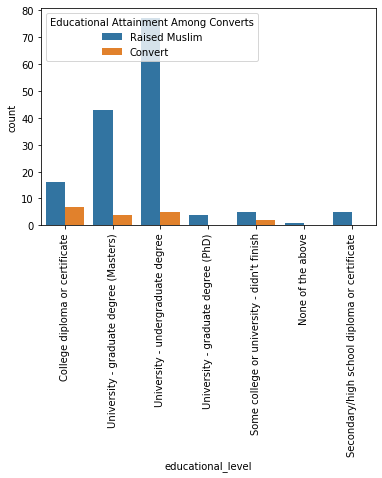

In [101]:
nikkah_result = sns.countplot(data=df, x = 'educational_level', hue='convert')

plt.legend(title= 'Educational Attainment Among Converts', labels=['Raised Muslim', 'Convert'])

# formatting the x-axis
plt.xticks(rotation=90)

plt.show(nikkah_result)

# Visualizations About Marrieds and Divorced Respondents

In [102]:
df["single_during_search"].value_counts()

1    151
0     18
Name: single_during_search, dtype: int64

In [279]:
pd.crosstab(df.single_during_search, df.successful_search, margins=True)

successful_search,0,1,All
single_during_search,,,
0,12,6,18
1,136,15,151
All,148,21,169


In [16]:
pd.crosstab(df.arab, df.successful_search, margins=True)

successful_search,0,1,All
arab,,,
0,131,21,152
1,16,1,17
All,147,22,169


In [18]:
pd.crosstab(df.short_search, df.successful_search, margins=True)

successful_search,0,1,All
short_search,,,
0,124,20,144
1,23,2,25
All,147,22,169


In [103]:
df["div_factor_prac_mismatch"].value_counts()


0    164
1      5
Name: div_factor_prac_mismatch, dtype: int64

In [104]:
df["div_factor_distance"].value_counts()

0    166
1      3
Name: div_factor_distance, dtype: int64

In [105]:
df["div_factor_pers"].value_counts()

0    164
1      5
Name: div_factor_pers, dtype: int64

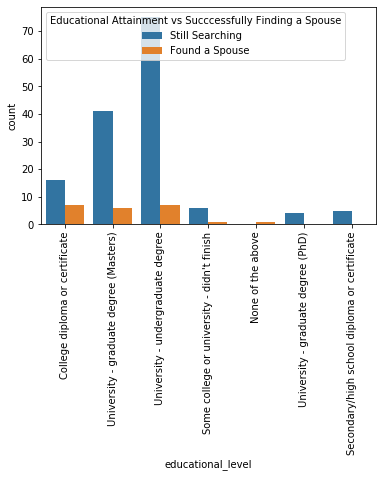

In [19]:
nikkah_result = sns.countplot(data=df, x = 'educational_level', hue='successful_search')

plt.legend(title='Educational Attainment vs Succcessfully Finding a Spouse', labels=['Still Searching', 'Found a Spouse'])

# formatting the x-axis
plt.xticks(rotation=90)

plt.show(nikkah_result)

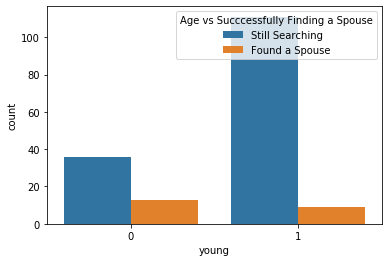

In [20]:
nikkah_result = sns.countplot(data=df, x = 'young', hue='successful_search')

plt.legend(title='Age vs Succcessfully Finding a Spouse', labels=['Still Searching', 'Found a Spouse'])
plt.show(nikkah_result)

In [21]:
pd.crosstab(df.young, df.successful_search, margins=True)

successful_search,0,1,All
young,,,
0,36,13,49
1,111,9,120
All,147,22,169


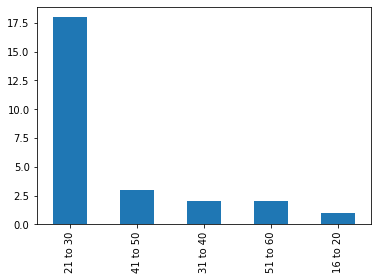

In [127]:
df['age_at_nikkah'].value_counts().plot(kind='bar')

In [22]:
df['successful_search'].value_counts()

0    147
1     22
Name: successful_search, dtype: int64

In [278]:
pd.crosstab(df.neg_exper, df.mar_status_derived, margins=True)

mar_status_derived,1,2,3,All
neg_exper,,,,
0,12,100,12,124
1,5,32,8,45
All,17,132,20,169


In [23]:
df['young'].value_counts()

1    120
0     49
Name: young, dtype: int64

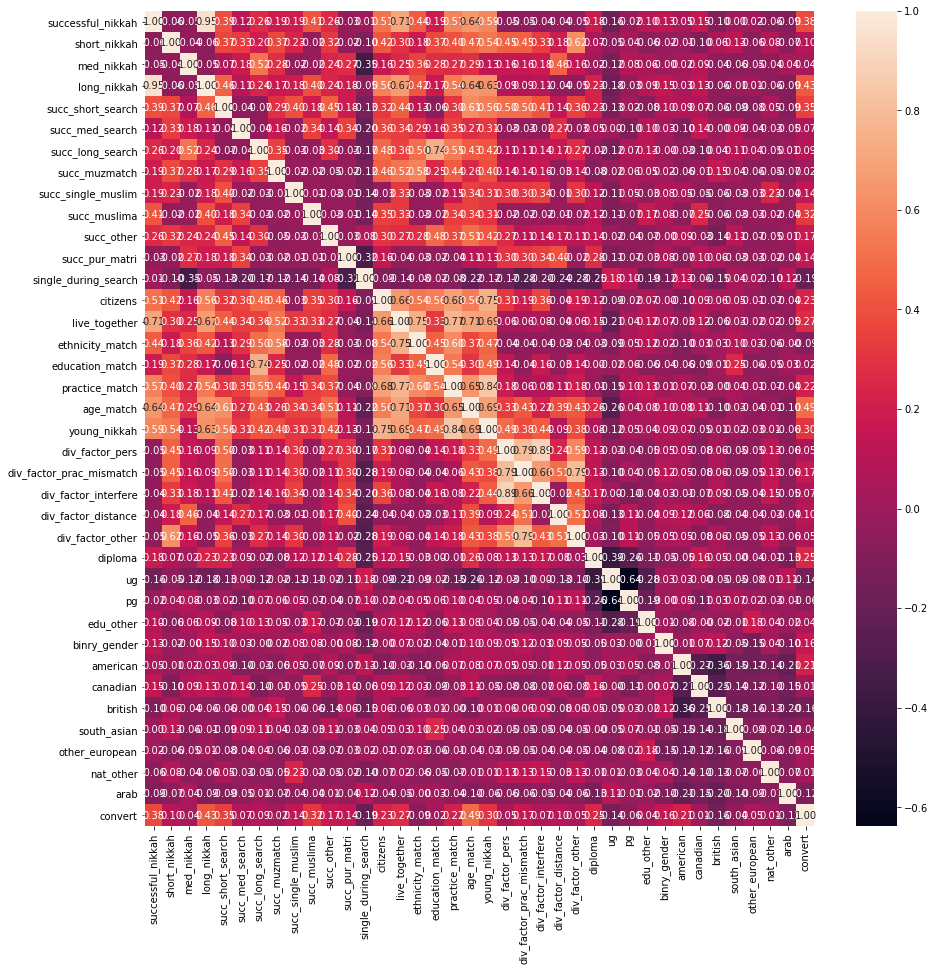

In [132]:
#  plot correlation's matrix to explore dependency between features for successful Nikkahs

def plot_correlation(data):

    # init figure size
#     rcParams['figure.figsize'] = 15, 20
    fig = plt.figure(figsize=(15, 15))
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()

# plot correlation & densities
#plot_correlation(df[['successful_nikkah','citizens','live_together','ethnicity_match', 'education_match','practice_match', 'age_match', 'young_nikkah','canadian', 'american','pg', 'ug', 'diploma']])
plot_correlation(df[['successful_nikkah','short_nikkah', 'med_nikkah', 'long_nikkah', 'succ_short_search','succ_med_search', 'succ_long_search', 'succ_muzmatch', 'succ_single_muslim','succ_muslima','succ_other', 'succ_pur_matri','single_during_search','citizens','live_together','ethnicity_match', 'education_match','practice_match', 'age_match', 'young_nikkah', 'div_factor_pers','div_factor_prac_mismatch', 'div_factor_interfere','div_factor_distance', 'div_factor_other', 'diploma','ug', 'pg', 'edu_other', 'binry_gender', 'american', 'canadian', 'british', 'south_asian', 'other_european','nat_other','arab','convert']])



In [141]:
# # Check correlation between age category (young and not) and how well-matched the couple is in their level of Islamic practice
# #Get all data where age at nikkah was young
# young_age_nikkah = df.query('young_nikkah == "1.0"')
# older_age_nikkah = df.query('young_nikkah == "0.0"')
# sns.countplot(data=young_age_nikkah, x = 'practice_match')

In [ ]:
# # Check correlation between the age category (young and not) and how well-matched the couple is in their shared ethnicity

# #Get all data where age at nikkah was young
# young_age_nikkah = df.query('age_nikkah == "1.0"')
# older_age_nikkah = df.query('age_nikkah == "0.0"')
# sns.countplot(data=young_age_nikkah, x = 'ethnicity_match')

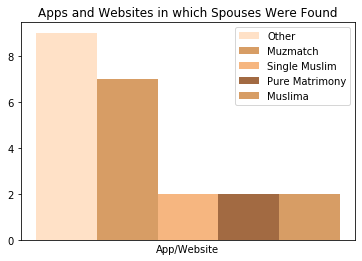

In [24]:
# Different apps that were successful correlation to successful searches

nikkah_result = df.query('successful_search == "1"')
no_or_offline_spouse = df.query('successful_search == "0"')

# #sns.countplot(data=nikkah_result, x = 'app_success_Muzmatch')

Other = len((nikkah_result.query('succ_other == "1" ')).axes[0])
Muslima = len ((nikkah_result.query('succ_muslima == "1"')).axes[0])
Single_Muslim =len((nikkah_result.query('succ_single_muslim == "1"')).axes[0])
Pure_Matrimony = len((nikkah_result.query('succ_pur_matri == "1"')).axes[0])
Muzmatch = len((nikkah_result.query('succ_muzmatch == "1" ')).axes[0])


Other = (Other)
Muzmatch = (Muzmatch)
Pure_Matrimony = (Pure_Matrimony)
Single_Muslim = (Single_Muslim)
Muslima = (Muslima)


fig, ax = plt.subplots()
index = np.arange(1)
bar_width = 0.05
opacity = 0.8

rects1 = plt.bar(index - (2*bar_width), Other, bar_width,
alpha=opacity,
color='peachpuff',
label='Other')

rects2 = plt.bar(index - bar_width, Muzmatch, bar_width,
alpha=opacity,
color='peru',
label='Muzmatch')

rects3 = plt.bar(index, Single_Muslim, bar_width,
alpha=opacity,
color='sandybrown',
label='Single Muslim')

rects4 = plt.bar(index + bar_width , Pure_Matrimony, bar_width,
alpha=opacity,
color='saddlebrown',
label='Pure Matrimony')

rects5 = plt.bar(index + (2*bar_width) , Muslima, bar_width,
alpha=opacity,
color='peru',
label='Muslima')


plt.title('Apps and Websites in which Spouses Were Found')
plt.xticks([])
plt.legend()
plt.xlabel('App/Website')
#plt.tight_layout()
plt.show()



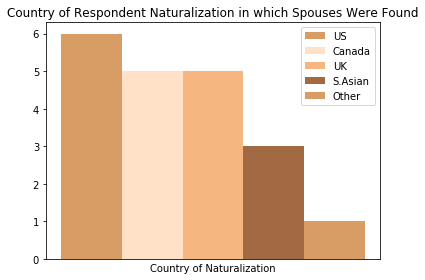

In [25]:
# Different countries of origin that were successful correlation to successful searches

nikkah_result = df.query('successful_search == "1"')
no_or_offline_spouse = df.query('successful_search == "0"')

# #sns.countplot(data=nikkah_result, x = 'app_success_Muzmatch')

US = len ((nikkah_result.query('american == "1"')).axes[0])
Can = len((nikkah_result.query('canadian == "1"')).axes[0])
UK =len((nikkah_result.query('british == "1"')).axes[0])
Asian = len((nikkah_result.query('south_asian == "1" ')).axes[0])
Other = len((nikkah_result.query('nat_other == "1" ')).axes[0])

US = (US)
Can = (Can)
UK = (UK)
Asian = (Asian)
Other = (Other)

fig, ax = plt.subplots()
index = np.arange(1)
bar_width = 0.05
opacity = 0.8

rects1 = plt.bar(index - (2 * bar_width), US, bar_width,
alpha=opacity,
color='peru',
label='US')

rects2 = plt.bar(index - bar_width, Can, bar_width,
alpha=opacity,
color='peachpuff',
label='Canada')

rects3 = plt.bar(index, UK, bar_width,
alpha=opacity,
color='sandybrown',
label='UK')

rects4 = plt.bar(index + bar_width , Asian, bar_width,
alpha=opacity,
color='saddlebrown',
label='S.Asian')

rects5 = plt.bar(index + (2*bar_width) , Other, bar_width,
alpha=opacity,
color='peru',
label='Other')


plt.title('Country of Respondent Naturalization in which Spouses Were Found')
plt.xticks([])
plt.legend()
plt.xlabel('Country of Naturalization')
plt.tight_layout()
plt.show()



# Normalise Feature Set

In [205]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

# XGBoost Classifier
With Nan

In [268]:
X = df.dropna(subset = ["successful_search"], inplace=True)
X = df.drop(['successful_search'], axis = 1)

# Limit X to marrieds and divorced respondents, not singles
#X = df.query('mar_status_derived != "2"')

# Limit X to the following columns
#X = df[{ "num_cat_tries","convert","young", "diploma","short_search","med_search","neg_exper", "single_during_search","num_cat_potentials","long_search", "canadian", "positive_exper" } ]
#X = df[{ "num_cat_tries","neg_exper","positive_exper", "single_during_search","num_cat_potentials","succ_long_search", "succ_short_search", "succ_muslima","succ_other", "practice_match", "education_match", "ug","pg" } ]
#X = df[{ "american", "british", "canadian","convert","num_cat_tries","neg_exper","positive_exper", "single_during_search","num_cat_potentials","succ_long_search", "succ_short_search", "succ_muslima","succ_other", "practice_match", "education_match", "ug","pg" } ]
#X = df[{ "american", "canadian","convert","num_cat_tries","neg_exper","positive_exper", "single_during_search","num_cat_potentials", "succ_short_search", "succ_muzmatch","succ_other", "succ_pur_matri","practice_match", "age_match","young_nikkah", "ug","diploma", "live_together","citizens" } ]
#X = df[{ "num_cat_tries","convert","young", "diploma","short_search","med_search", "single_during_search","num_cat_potentials","long_search", "canadian","british","american","south_asian",  "num_sites_using", "positive_exper","succ_muzmatch" } ]
#X = df[{ "convert","young", "diploma","short_search","med_search", "single_during_search","long_search", "canadian","british","american","south_asian", "positive_exper" } ]
#X = df[{ "convert","young", "diploma","short_search","med_search", "single_during_search","long_search", "canadian","british","american","south_asian", "positive_exper", "succ_short_search", "succ_muzmatch","succ_other", "succ_pur_matri","practice_match", "age_match","young_nikkah", "ug", "live_together","citizens"  } ]
#X = df[{ "young_nikkah","age_match", "succ_short_search","live_together","practice_match","citizens","succ_other","succ_muzmatch","succ_med_search","convert", "succ_pur_matri","young", "single_during_search","diploma", "num_cat_potentials","long_search","positive_exper","ug", "recommends_search_online","med_search","other_european", "canadian","south_asian", "binry_gender", "arab", "short_search","neg_exper" } ]
X = df[{ "succ_short_search","succ_other","succ_muzmatch","succ_med_search","convert", "succ_pur_matri","young", "single_during_search","diploma", "num_cat_potentials","long_search","positive_exper","ug", "recommends_search_online","med_search","other_european", "canadian","south_asian", "binry_gender", "arab", "short_search","neg_exper" , "num_sites_using","british","num_cat_tries","american","pg"} ]


X = X.select_dtypes(include=['int', 'float64', 'uint8'])
y = df['successful_search']

x = X.apply(pd.to_numeric)
X = X.applymap(lambda x: np.log(x+1) if x >= 0 else -np.log(-x+1))
X = normalize(X)

In [272]:
import sklearn
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    shuffle = True,
                                                    random_state=0)

# X_train = (X)
# X_test = ('mar_status_derived == "2"')
# y_train, y_test = train_test_split(y,
                                                    
#                                                     shuffle = True,
#                                                     random_state=0)
params = {'random_state': [0],
                 'eta': [0.02, 0.03, 0.05],
                 'gamma': [2, 4, 6],
                 'max_depth': [2, 3, 4],
                 'scale_pos_weight': [0.5, 0.9, 1],
                 'n_estimators': [200, 300, 400]}

clf = GridSearchCV(xgb.XGBClassifier(), params, cv = 5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'eta': [0.02, 0.03, 0.05], 'gamma': [2, 4, 6],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [200, 300, 400]

In [273]:
#best_grid #Best combination of the parameters

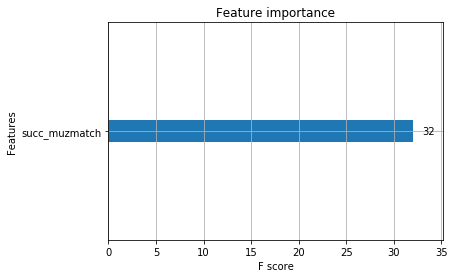

*********TEST RESULTS*********


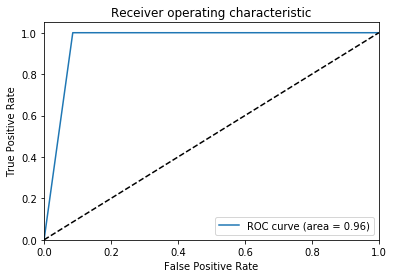

AUC 0.9571428571428571 
Accuracy 0.9302325581395349 
Precision 0.7272727272727273 
Recall 1.0 
F1 0.8421052631578948 
Confusion Matrix:


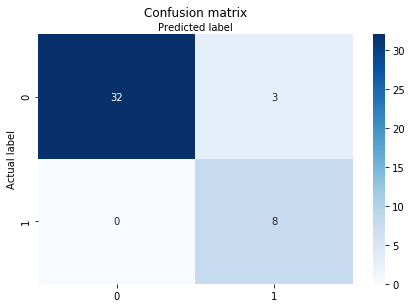

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.73      1.00      0.84         8

    accuracy                           0.93        43
   macro avg       0.86      0.96      0.90        43
weighted avg       0.95      0.93      0.93        43



In [274]:
# fit the model with the best grid otained from the gridsearch - the reason why i have duplicated this 
# is so i can plot the feature importance easily. The grid search does not have this option to do it easily 
# (at least from what i could find)


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    shuffle = True,
                                                    random_state=0)

clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.02, gamma=2, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

clf.fit(X_train, y_train)
       
from xgboost import plot_importance
plot_importance(clf._Booster)
plt.show()

y_train_pred =    clf.predict(X_train)
y_test_pred  =    clf.predict(X_test)
y_train_pred_pr = clf.predict_proba(X_train)[:,-1]
y_test_pred_pr =  clf.predict_proba(X_test)[:,-1]

auc_score, accuracy, precision, recall, f1 = test_results(y_test, y_test_pred, y_test_pred_pr)

In [275]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

thresholds = sort(clf.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(clf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = xgb.XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [14]:
X = df.dropna(subset = ["successful_nikkah"], inplace=True)
X = df.drop(['successful_nikkah'], axis = 1)

#Limit X to marrieds and divorced respondents, not singles
X = df.query('mar_status_derived != "2"')

# Limit X to the following columns
X = df[{ 'long_nikkah', 'succ_short_search','succ_muzmatch','succ_muslima','citizens','live_together','ethnicity_match', 'education_match','practice_match', 'age_match', 'young_nikkah', 'convert'  } ]

X = X.select_dtypes(include=['int', 'float64', 'uint8'])
y = df['successful_nikkah']

x = X.apply(pd.to_numeric)
X = X.applymap(lambda x: np.log(x+1) if x >= 0 else -np.log(-x+1))
X = normalize(X)

In [15]:
import sklearn
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    shuffle = True,
                                                    random_state=0)

# X_train = (X)
# X_test = ('mar_status_derived == "2"')
# y_train, y_test = train_test_split(y,
                                                    
#                                                     shuffle = True,
#                                                     random_state=0)
params = {'random_state': [0],
                 'eta': [0.02, 0.03, 0.05],
                 'gamma': [2, 4, 6],
                 'max_depth': [2, 3, 4],
                 'scale_pos_weight': [0.5, 0.9, 1],
                 'n_estimators': [200, 300, 400]}

clf = GridSearchCV(xgb.XGBClassifier(), params, cv = 5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'eta': [0.02, 0.03, 0.05], 'gamma': [2, 4, 6],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [200, 300, 400]

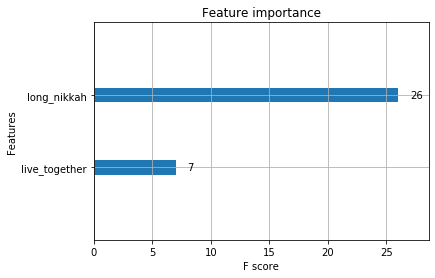

*********TEST RESULTS*********


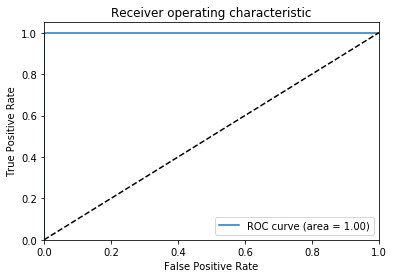

AUC 1.0 
Accuracy 1.0 
Precision 1.0 
Recall 1.0 
F1 1.0 
Confusion Matrix:


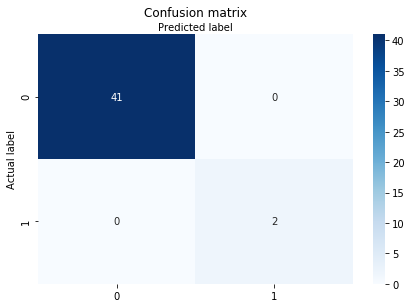

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00         2

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [16]:
# fit the model with the best grid otained from the gridsearch - the reason why i have duplicated this 
# is so i can plot the feature importance easily. The grid search does not have this option to do it easily 
# (at least from what i could find)


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    shuffle = True,
                                                    random_state=0)

clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.02, gamma=2, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

clf.fit(X_train, y_train)
       
from xgboost import plot_importance
plot_importance(clf._Booster)
plt.show()

y_train_pred =    clf.predict(X_train)
y_test_pred  =    clf.predict(X_test)
y_train_pred_pr = clf.predict_proba(X_train)[:,-1]
y_test_pred_pr =  clf.predict_proba(X_test)[:,-1]

auc_score, accuracy, precision, recall, f1 = test_results(y_test, y_test_pred, y_test_pred_pr)

# KNN Classifier

In [166]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

X = df.dropna(subset = ["successful_search"], inplace=True)
X = df.drop(['successful_search'], axis = 1)

# Limit X to the following columns
#X = df[{ "num_cat_tries","convert","diploma","short_search","neg_exper", "single_during_search","num_cat_potentials","long_search", "canadian", "positive_exper" } ]
#X = df[{ "num_tries","neg_exper","positive_exper", "single_during_search","num_potentials","succ_long_search", "succ_short_search", "succ_muslima","succ_other", "practice_match", "education_match", "ug","pg" } ]
X = df[{ "num_cat_tries","convert","young", "diploma","short_search","med_search", "single_during_search","num_cat_potentials","long_search", "canadian","british","american","south_asian",  "num_sites_using", "positive_exper" } ]


X = X.select_dtypes(include=['int', 'float64', 'uint8'])
y = df['successful_search']

x = X.apply(pd.to_numeric)
X = X.applymap(lambda x: np.log(x+1) if x >= 0 else -np.log(-x+1))
X = normalize(X)
X = X.fillna(-1)


*********TEST RESULTS*********


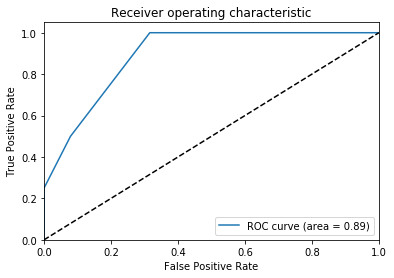

AUC 0.8914473684210527 
Accuracy 0.8809523809523809 
Precision 0.4 
Recall 0.5 
F1 0.4444444444444445 
Confusion Matrix:


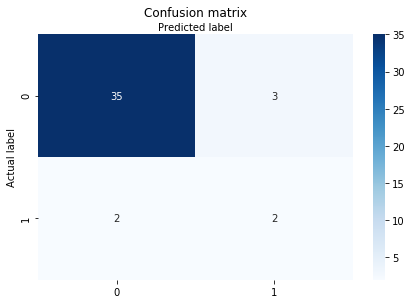

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.40      0.50      0.44         4

    accuracy                           0.88        42
   macro avg       0.67      0.71      0.69        42
weighted avg       0.89      0.88      0.89        42

*****************************CROSS VALIDATION****************************** 

Top performing n_neighbors value: {'n_neighbors': 7}
mean score for the top performing value of n_neighbors: 0.8816399286987522


In [167]:
import sklearn

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.245,
                                                    shuffle = True,
                                                    random_state=4)
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train,y_train)
y_train_pred =    clf.predict(X_train)
y_test_pred  =    clf.predict(X_test)
y_train_pred_pr = clf.predict_proba(X_train)[:,-1]
y_test_pred_pr =  clf.predict_proba(X_test)[:,-1]

auc_score, accuracy, precision, recall, f1 = test_results(y_test, y_test_pred, y_test_pred_pr)

#Cross validation

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, y)



print('*****************************CROSS VALIDATION****************************** \n')
#check top performing n_neighbors value
print('Top performing n_neighbors value:', knn_gscv.best_params_)

#check mean score for the top performing value of n_neighbors
print('mean score for the top performing value of n_neighbors:', knn_gscv.best_score_)

In [170]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

X = df.dropna(subset = ["successful_nikkah"], inplace=True)
X = df.drop(['successful_nikkah'], axis = 1)
X = X.select_dtypes(include=['int', 'float64', 'uint8'])
y = df['successful_nikkah']

x = X.apply(pd.to_numeric)
X = X.applymap(lambda x: np.log(x+1) if x >= 0 else -np.log(-x+1))
X = normalize(X)
X = X.fillna(-1)


*********TEST RESULTS*********


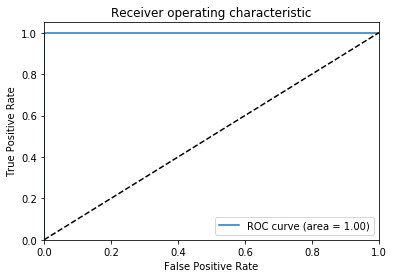

AUC 1.0 
Accuracy 1.0 
Precision 1.0 
Recall 1.0 
F1 1.0 
Confusion Matrix:


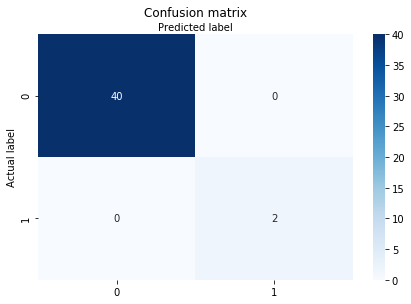

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00         2

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

*****************************CROSS VALIDATION****************************** 

Top performing n_neighbors value: {'n_neighbors': 3}
mean score for the top performing value of n_neighbors: 0.9705882352941178


In [171]:
import sklearn

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.245,
                                                    shuffle = True,
                                                    random_state=4)
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train,y_train)
y_train_pred =    clf.predict(X_train)
y_test_pred  =    clf.predict(X_test)
y_train_pred_pr = clf.predict_proba(X_train)[:,-1]
y_test_pred_pr =  clf.predict_proba(X_test)[:,-1]

auc_score, accuracy, precision, recall, f1 = test_results(y_test, y_test_pred, y_test_pred_pr)

#Cross validation

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, y)



print('*****************************CROSS VALIDATION****************************** \n')
#check top performing n_neighbors value
print('Top performing n_neighbors value:', knn_gscv.best_params_)

#check mean score for the top performing value of n_neighbors
print('mean score for the top performing value of n_neighbors:', knn_gscv.best_score_)